## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [18]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [5]:
fashion_mnist = fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

In [6]:
print(train_images.shape)  #60000 images 28x28 pixels
print(train_labels.shape) # labels (labelling images 0-9)

(60000, 28, 28)
(60000,)


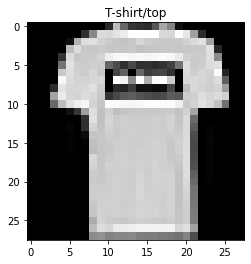

In [10]:
# display each picture and label
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 1
image = train_images[sample]# plot the sample
fig = plt.figure
plt.title(class_names[train_labels[sample]])
plt.imshow(image, cmap='gray')
plt.show()

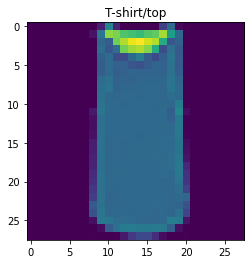

In [17]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 2
image = train_images[sample]# plot the sample
fig = plt.figure
plt.title(class_names[train_labels[sample]])
plt.imshow(image)
plt.show()

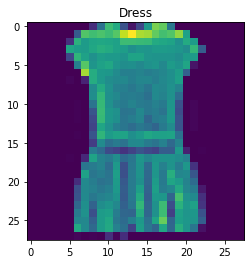

In [16]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 3
image = train_images[sample]# plot the sample
fig = plt.figure
plt.title(class_names[train_labels[sample]])
plt.imshow(image)
plt.show()

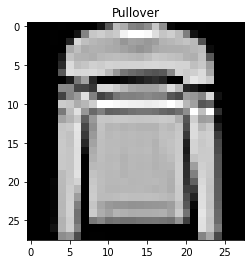

In [13]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 5
image = train_images[sample]# plot the sample
fig = plt.figure
plt.title(class_names[train_labels[sample]])
plt.imshow(image, cmap='gray')
plt.show()

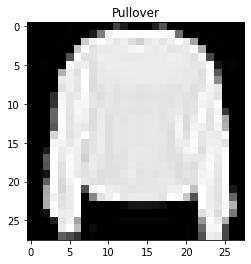

In [14]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 7
image = train_images[sample]# plot the sample
fig = plt.figure
plt.title(class_names[train_labels[sample]])
plt.imshow(image, cmap='gray')
plt.show()

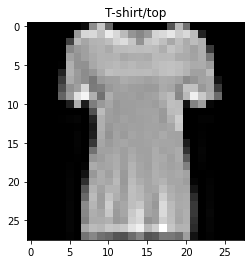

In [15]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 10
image = train_images[sample]# plot the sample
fig = plt.figure
plt.title(class_names[train_labels[sample]])
plt.imshow(image, cmap='gray')
plt.show()

Task 2 Normalize data between 0-1
need to reshape - but also normalize... but why??

if x is too large in the activatio function (

In [22]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [26]:
# make sure network knows its categorical and not regression
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [31]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
# Train the model
# model.compile(optimizer='adam', loss='cross-entropy')
network.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128, callbacks=[EarlyStopping(patience=3)], verbose=1)


Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4679 - accuracy: 0.8311 - val_loss: 0.4535 - val_accuracy: 0.8325
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3500 - accuracy: 0.8717 - val_loss: 0.3556 - val_accuracy: 0.8680
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3088 - accuracy: 0.8864 - val_loss: 0.3667 - val_accuracy: 0.8637
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2860 - accuracy: 0.8938 - val_loss: 0.3446 - val_accuracy: 0.8778
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2702 - accuracy: 0.8979 - val_loss: 0.3400 - val_accuracy: 0.8780


In [30]:
# After running above 3 times
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8865
test_acc: 0.8865000009536743 test_loss 0.3387065827846527


In [ ]:
test_images